In [1]:
#Import Depend
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt


In [2]:
#Import Data

df = pd.read_csv('TSLA.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999


In [3]:
#check types 
df.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [4]:
#convert date to useful for linear 
df['Date'] = pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)

In [5]:
df.dtypes

Date           int64
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [6]:
#if needed to drop columns 
#df = df.drop(df.columns[[0, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17]], axis=1)
#df.head(10)

In [7]:
#Create the X variables
X = df.drop(['Date'], axis=1)

In [8]:
#Create the y variable 
y = df['Date']

In [9]:
# Data split for performance testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#Linear Reggresion 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
#model prediction 
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [12]:
#test performance 
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [13]:
print(lr_train_mse)

7668.20679496144


In [14]:
print(lr_train_r2)

0.8927425349605577


In [15]:
print(lr_test_mse)

6925.662671259988


In [16]:
print(lr_test_r2)

0.8995419749322219


In [17]:
lr_results = pd.DataFrame([lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()

In [18]:
#Random forest 
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=42)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=42)

In [19]:
#RF Prediction

y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [21]:
rf_results = pd.DataFrame([rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()

In [22]:
pd.concat([lr_results, rf_results])

,0,1,2,3
0,7668.206795,0.892743,6925.662671,0.899542
0,7396.522692,0.896543,8349.287842,0.878892


Text(0.5, 0, 'Experimental LogS')

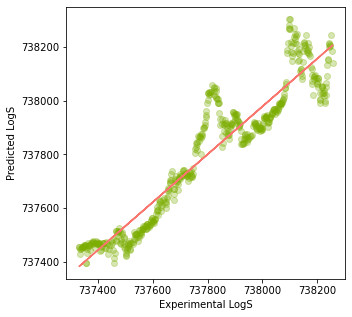

In [23]:
#plot the results 
plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00", alpha=0.3)
z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train,p(y_train),"#F8766D")
plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')